In [1]:
### Benjamin Tollison ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sympy as sp
from IPython.display import Latex, Math, display
from sympy import (
    Eq,
    Function,
    Matrix,
    cos,
    cosh,
    exp,
    integrate,
    lambdify,
    pi,
    sin,
    sinh,
    symbols,
)
from decimal import Decimal
from sympy.solvers.pde import pdsolve
from sympy.solvers.solveset import linsolve
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
def format_scientific(number:float):
    a = '%E' % number
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]
deg2rad = np.pi/180
rad2deg = 180/np.pi

,C_Tmeasured,C_Pmeasured,C_P,C_T
0,0.000006,0.000197,NaN,NaN
1,0.001049,0.000226,NaN,NaN
2,0.002376,0.000282,NaN,NaN
3,0.004076,0.000405,NaN,NaN
4,0.005581,0.000555,NaN,NaN


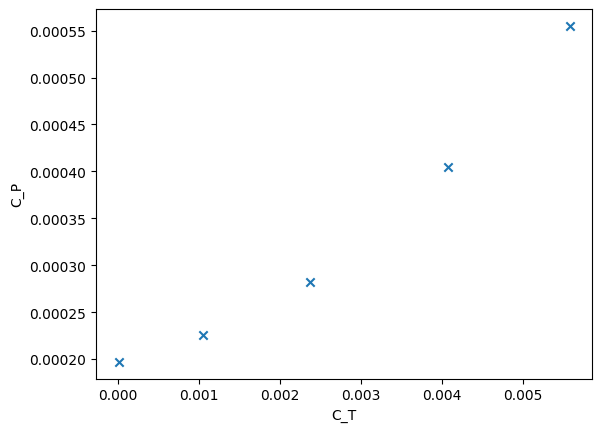

In [2]:
rotor_performance = {
  'C_Tmeasured':[6.0000e-06, 0.0010490,0.0023760, 0.0040760, 0.0055810],
  'C_Pmeasured':[.000197,0.000226, 0.000282, 0.000405, 0.000555],
  'C_P':['NaN' for i in range(5)],
  'C_T':['NaN' for i in range(5)]
}
display(pd.DataFrame(rotor_performance))
del rotor_performance['C_P']
del rotor_performance['C_T']
# plt.rcParams['text.usetex'] = True
plt.scatter(rotor_performance['C_Tmeasured'],rotor_performance['C_Pmeasured'],marker='x',label='measured')
# plt.title('\\textbf{C_P v. C_T}')
plt.xlabel('C_T')
plt.ylabel('C_P')
# axis = plt.gca()
# axis.set_aspect('equal',adjustable='box')
plt.show()

,C_Tmeasured,C_Pmeasured,C_P_ideal
0,0.000006,0.000197,1.039230e-08
1,0.001049,0.000226,2.402416e-05
2,0.002376,0.000282,8.189449e-05
3,0.004076,0.000405,1.840078e-04
4,0.005581,0.000555,2.948173e-04


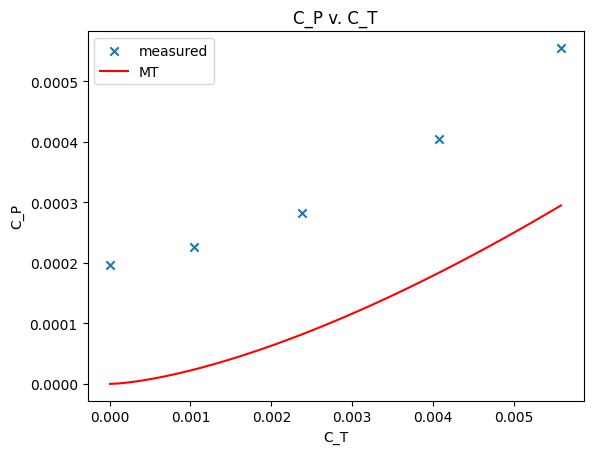

In [3]:
def CoefficientPowerMT(coefficient_of_thrust):
  return coefficient_of_thrust**(3/2) / 2**0.5
coefficient_of_thrust_values = np.linspace(float(rotor_performance['C_Tmeasured'][0]),rotor_performance['C_Tmeasured'][-1])
coefficient_of_power_momentum_theory = [CoefficientPowerMT(i) for i in np.linspace(0,coefficient_of_thrust_values[-1])]
rotor_performance['C_P_ideal'] = [CoefficientPowerMT(i) for i in rotor_performance['C_Tmeasured']]
display(pd.DataFrame(rotor_performance))
plt.scatter(rotor_performance['C_Tmeasured'],rotor_performance['C_Pmeasured'],marker='x',label='measured')
plt.plot(coefficient_of_thrust_values,coefficient_of_power_momentum_theory,label='MT',color='r')
plt.title('C_P v. C_T')
plt.xlabel('C_T')
plt.ylabel('C_P')
plt.legend()
plt.show()

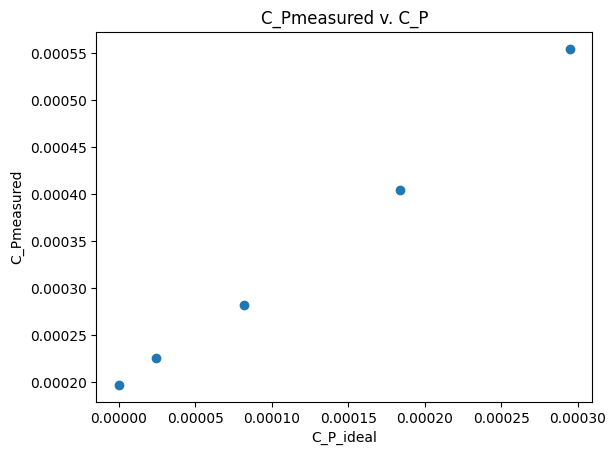

In [4]:
plt.scatter(rotor_performance['C_P_ideal'],rotor_performance['C_Pmeasured'],marker='o',label='measured')
plt.title('C_Pmeasured v. C_P')
plt.xlabel('C_P_ideal')
plt.ylabel('C_Pmeasured')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

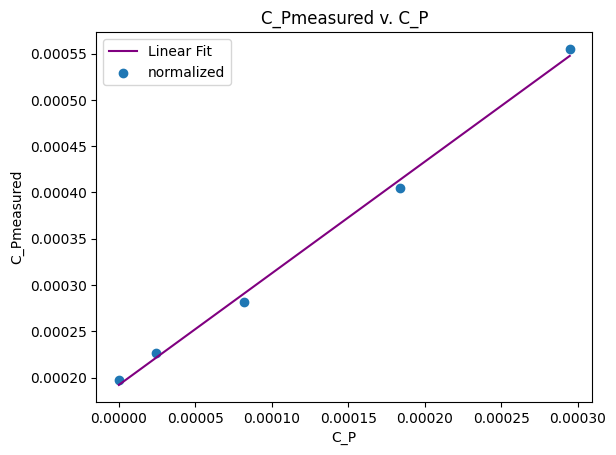

In [5]:
kappa, C_P0, r_value, p_value, std_error = scipy.stats.linregress(rotor_performance['C_P_ideal'],rotor_performance['C_Pmeasured'])
linear_fit = [float(kappa*i+C_P0) for i in rotor_performance['C_P_ideal']]
displayVariable('\\kappa',kappa)
displayVariable('C_{P0}',C_P0)
plt.plot(rotor_performance['C_P_ideal'],linear_fit,label='Linear Fit',color='purple')
plt.scatter(rotor_performance['C_P_ideal'],rotor_performance['C_Pmeasured'],marker='o',label='normalized')
plt.title('C_Pmeasured v. C_P')
plt.xlabel('C_P')
plt.ylabel('C_Pmeasured')
plt.legend()
plt.show()

,C_Tmeasured,C_Pmeasured,C_P_ideal,C_P_MMT
0,0.000006,0.000197,1.039230e-08,0.000192
1,0.001049,0.000226,2.402416e-05,0.000221
2,0.002376,0.000282,8.189449e-05,0.000291
3,0.004076,0.000405,1.840078e-04,0.000414
4,0.005581,0.000555,2.948173e-04,0.000547


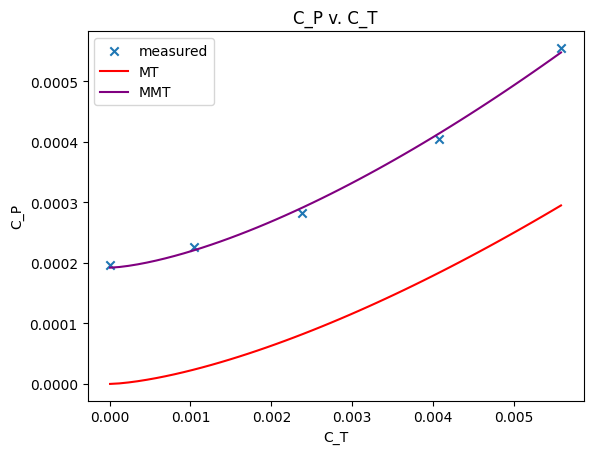

In [6]:
def ModifiedMomentumTheory(coefficient_of_thrust):
  return kappa*(coefficient_of_thrust**1.5/2**0.5) + C_P0
rotor_performance['C_P_MMT'] = [float(ModifiedMomentumTheory(i)) for i in rotor_performance['C_Tmeasured']]
display(pd.DataFrame(rotor_performance))
plt.scatter(rotor_performance['C_Tmeasured'],rotor_performance['C_Pmeasured'],marker='x',label='measured')
plt.plot(coefficient_of_thrust_values,coefficient_of_power_momentum_theory,label='MT',color='r')
plt.plot(coefficient_of_thrust_values,ModifiedMomentumTheory(coefficient_of_thrust_values),label='MMT',color='purple')
plt.title('C_P v. C_T')
plt.xlabel('C_T')
plt.ylabel('C_P')
plt.legend()
plt.show()

### 3)
$$ T = mg $$
$$ \sigma = \pi R^2 $$
$$ \text{DL} = \frac{T}{\sigma} $$
$$ PL_{ideal} = \frac{T}{Tv_i} = \frac{1}{v_i} = \sqrt{\frac{2\rho}{DL}} $$
$$ C_T = \frac{T}{\rho\sigma(\Omega R)^2} $$
$$ C_{P,ideal} = \frac{P_h}{\rho\sigma(\Omega R)^3},C_{P,measured} = \frac{P}{\rho\sigma(\Omega R)^3} $$
$$ FM = \frac{P_h}{P_{actual}} = \frac{C_{P,ideal}}{C_{P,measured}} $$
$$ PL_{actual} = \frac{PL_{ideal}}{FM} $$

In [19]:
rotor_radius = 4.0 # m
gross_weight = 1360.5 # kg
rotor_tip_speed = 207.3 # m/s
given_power = 205*1000 # W
rotor_area = np.pi*rotor_radius**2
thrust = gross_weight*9.81 # N
density = 1.225 # kg/m^3
disk_loading = thrust/rotor_area
displayVariable('DL',disk_loading)
power_hover = thrust**1.5 / (2*density*rotor_area)**0.5
power_loading_ideal = (2*density/disk_loading)**0.5
displayVariable('PL_{ideal}',power_loading_ideal)
coefficient_of_thrust = thrust/(density*rotor_area*rotor_tip_speed**2)
displayVariable('C_T',coefficient_of_thrust)
coefficient_of_power_ideal = power_hover / (density*rotor_area*rotor_tip_speed**3)
coefficient_of_power_actual = given_power / (density*rotor_area*rotor_tip_speed**3)
displayVariable('C_{P\\,ideal}',coefficient_of_power_ideal)
displayVariable('C_{P\\,actual}',coefficient_of_power_actual)
figure_of_merit = power_hover/given_power
displayVariable('FM',figure_of_merit)
power_loading_actual = power_loading_ideal / figure_of_merit
displayVariable('PL_{actual}',power_loading_actual)
power_actual = power_hover / figure_of_merit
displayVariableWithUnits('P_{actual}',power_actual,'W')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 4)

$$ \tau = F \times r $$
$$ Q = T_{tail} \times r $$
$$ Q = C_{P,actual} \rho \sigma (\Omega R)^2 R $$
$$ \therefore T_{tail} = \frac{Q}{r} $$
$$ P = \frac{T^\frac{3}{2}}{\sqrt{2\rho\sigma}} $$

In [22]:
tail_rotor_radius = 0.701 # m
distance_from_main_rotor = 4.66 # m
figure_of_merit_tail = 0.7
torque = coefficient_of_power_actual*density*rotor_area*rotor_tip_speed**2*rotor_radius
thrust_tail = torque / distance_from_main_rotor
displayVariableWithUnits('T_{tail}',thrust_tail,'N')
power_tail = thrust_tail**1.5 / (2*density*np.pi*tail_rotor_radius**2)**0.5
displayVariableWithUnits('P_{tail}',power_tail,'W')

<IPython.core.display.Math object>

<IPython.core.display.Math object>